In [1]:
%matplotlib widget

from pathlib import Path
import os
from os.path import isfile
from os import makedirs

import sys
sys.path.insert(1, os.path.join(sys.path[0], '/scratch/repos/iis_data_analysis'))

from datetime import datetime, timedelta

import copy
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import numpy as np

from loader import Loader
lo = Loader()

from analyzer import Analyzer

In [2]:
def _clean_string(string):
    string = string.replace(' ', '_')
    string = string.replace(';', '_')
    string = string.replace(',', '_')
    string = string.replace('(', '')
    string = string.replace(')', '')
    string = string.replace('/', '_')
    string = string.replace(':', '')
    string = string.replace('.', '_')

    return string

def _generate_safe_path(dir_path, subfolder_name, name):
    # Set save path
    save_dir = dir_path / Path(subfolder_name)
    
    try:
        makedirs(save_dir)
    except FileExistsError:
        pass
    
    name = _clean_string(name)
    
    safepath = save_dir / Path(str(name))
    return safepath

def _rename_safepath(dir_path, subfolder_name, name):
    num = 2
    while True:
        new_name = name + f'_{num}'
        new_safepath = _generate_safe_path(dir_path, subfolder_name, new_name)
        if not isfile(str(new_safepath)+'.png'):
            break
        num = num+1
    return new_safepath


def save_figures(figures, safenames, directory, dpi=300, filetype='png'):

    for i, fig in enumerate(figures):
        name = safenames[i]

        # Set name of subfolder (will be generated if it doesn't exist)
        subfolder_name = 'clean'

        safepath = _generate_safe_path(directory, subfolder_name, name)

        print(safepath)
        save_flag = True
        if isfile(str(safepath)+'.'+filetype):
            print('Should file be overwritten: yes[y] / no [n] / rename [r]:')
            inp = input()
            if inp == 'n':
                print('Not saving...')
                save_flag = False
            elif inp == 'y':
                pass
            elif inp == 'r':
                safepath = _rename_safepath(directory, subfolder_name, name)
            else:
                print('Unknown input. Aborting...')
                save_flag = False

        if save_flag:
            fig.savefig(str(safepath) + '.' + filetype, dpi=dpi, bbox_inches="tight", format=filetype)

# Load Files 

In [3]:
json_timestamp_fnct = lambda x: datetime.strptime(x, '%Y%m%dT%H%M%S')
#json_timestamp_fnct = lambda x: datetime.strptime(x, '%Y%m%d_%H%M%S')
#csv_timestamp_fnct = lambda x: datetime.strptime(x, '%d.%m.%Y %H_%M_%S')
csv_timestamp_fnct = lambda x: datetime.strptime(x, '%m_%d_%Y %I_%M_%S %p')

parse_timestamp = True

attr_pattern_specs = {}
if parse_timestamp:
    attr_pattern_specs = {'timestamp':{'start':['^', '; '],
                                       'end':['_', ']'],
                                       'trans_fnct': [json_timestamp_fnct, csv_timestamp_fnct],
                                       'must_contain': ['.json', '.csv']
                                       }
                         }


In [4]:
# ============================= User input =============================
# Directory containing the measurement files
root = Path(r'/baltic/users/optolabdata/Experiments/ChristophWeilenmann/')
directory = root / Path(r'2024-08-13_cleansweep_5_8_nimbus_1')

print(directory)

# Specify a pattern that the filename must contain. Only filenames containing the pattern will be loaded
must_contain = '.json'
escape = False                           

# Specify metadata attributes to be read out of filename. 
# The attribute name will be set to the dictionary key (e.g. meas_name)
# The attribute value will be set to the string between the two patterns
user_attr_patterns = {
    'meas_name': {'start': '_', 'end': '\.'},
    'cluster': {'start': '(c\d+x\d+)', 'end': '*'},
    'device': {'start': '(d\d+x\d+)', 'end': '*'}
}


# Example Regex: 'P=\w{1,3}_' (matches patterns: 'P=on_', 'P=0_', 'P=off_', 'P=170')
# Example Regex: 'd\d+x\d+_' (matches pattern: 'd10023x2346_')
# Example Regex: '_(?!(no|UV))' (matches patterns: '_lksjdflj' but not '_no' or '_UV')
# =====================================================================

/baltic/users/optolabdata/Experiments/ChristophWeilenmann/2024-08-13_cleansweep_5_8_nimbus_1


<>:16: SyntaxWarning: invalid escape sequence '\.'
<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:18: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\.'
<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:18: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_308199/2515848182.py:16: SyntaxWarning: invalid escape sequence '\.'
  'meas_name': {'start': '_', 'end': '\.'},
/tmp/ipykernel_308199/2515848182.py:17: SyntaxWarning: invalid escape sequence '\d'
  'cluster': {'start': '(c\d+x\d+)', 'end': '*'},
/tmp/ipykernel_308199/2515848182.py:18: SyntaxWarning: invalid escape sequence '\d'
  'device': {'start': '(d\d+x\d+)', 'end': '*'}


In [5]:
attr_pattern_specs.update(user_attr_patterns)

lo.load_files(directory, must_contain=must_contain, attr_pattern_specs=attr_pattern_specs, escape=escape)

lo.print_files()

filename           timestamp  \
0     20240423T142330_cleansweep_5_dark_c3x4_d3x1.json 2024-04-23 14:23:30   
1     20240423T142443_cleansweep_5_dark_c3x4_d3x1.json 2024-04-23 14:24:43   
2     20240423T142651_cleansweep_5_dark_c3x4_d4x1.json 2024-04-23 14:26:51   
3     20240423T142742_cleansweep_5_dark_c3x4_d4x1.json 2024-04-23 14:27:42   
4     20240423T142902_cleansweep_5_dark_c3x4_d4x1.json 2024-04-23 14:29:02   
5     20240423T143000_cleansweep_5_dark_c3x4_d5x1.json 2024-04-23 14:30:00   
6     20240423T143013_cleansweep_5_dark_c3x4_d5x1.json 2024-04-23 14:30:13   
7     20240423T143103_cleansweep_5_dark_c3x4_d6x1.json 2024-04-23 14:31:03   
8     20240423T143207_cleansweep_5_dark_c3x4_d6x1.json 2024-04-23 14:32:07   
9     20240423T143348_cleansweep_5_dark_c3x4_d7x1.json 2024-04-23 14:33:48   
10    20240423T143455_cleansweep_5_dark_c3x4_d7x1.json 2024-04-23 14:34:55   
11    20240423T143645_cleansweep_5_dark_c3x4_d8x1.json 2024-04-23 14:36:45   
12    20240423T143755_cleansweep_5_dark_c3x4_d9x1.json 2024-04-23 14:37:55   
13    20240423T143815_cleansweep_5_dark_c3x4_d9x1.json 2024-04-23 14:38:15   
14    20240423T143833_cleansweep_5_dark_c3x4_d9x1.json 2024-04-23 14:38:33   
15    20240423T143849_cleansweep_5_dark_c3x4_d9x1.json 2024-04-23 14:38:49   
16    20240423T143901_cleansweep_5_dark_c3x4_d9x1.json 2024-04-23 14:39:01   
17    20240423T143917_cleansweep_5_dark_c3x4_d9x1.json 2024-04-23 14:39:17   
18    20240423T143936_cleansweep_5_dark_c3x4_d9x1.json 2024-04-23 14:39:36   
19    20240423T143958_cleansweep_5_dark_c3x4_d9x1.json 2024-04-23 14:39:58   
20    20240423T144012_cleansweep_5_dark_c3x4_d9x1.json 2024-04-23 14:40:12   
21    20240423T144029_cleansweep_5_dark_c3x4_d9x1.json 2024-04-23 14:40:29   
22    20240423T144047_cleansweep_5_dark_c3x4_d9x1.json 2024-04-23 14:40:47   
23    20240423T144155_cleansweep_5_dark_c3x4_d9x1.json 2024-04-23 14:41:55   
24   20240423T144340_cleansweep_5_dark_c3x4_d10x1.json 2024-04-23 14:43:40   
25   20240423T144606_cleansweep_5_dark_c3x4_d11x1.json 2024-04-23 14:46:06   
26   20240423T145207_cleansweep_5_dark_c3x4_d13x1.json 2024-04-23 14:52:07   
27   20240423T145313_cleansweep_5_dark_c3x4_d15x1.json 2024-04-23 14:53:13   
28   20240423T145421_cleansweep_5_dark_c3x4_d15x1.json 2024-04-23 14:54:21   
29   20240423T145659_cleansweep_5_dark_c3x4_d16x1.json 2024-04-23 14:56:59   
30    20240423T145810_cleansweep_5_dark_c3x4_d1x2.json 2024-04-23 14:58:10   
31    20240423T145907_cleansweep_5_dark_c3x4_d2x2.json 2024-04-23 14:59:07   
32    20240423T150102_cleansweep_5_dark_c3x4_d3x2.json 2024-04-23 15:01:02   
33    20240423T150211_cleansweep_5_dark_c3x4_d3x2.json 2024-04-23 15:02:11   
34    20240423T150257_cleansweep_5_dark_c3x4_d4x2.json 2024-04-23 15:02:57   
35    20240423T150312_cleansweep_5_dark_c3x4_d4x2.json 2024-04-23 15:03:12   
36    20240423T150329_cleansweep_5_dark_c3x4_d4x2.json 2024-04-23 15:03:29   
37    20240423T150432_cleansweep_5_dark_c3x4_d4x2.json 2024-04-23 15:04:32   
38    20240423T150530_cleansweep_5_dark_c3x4_d7x2.json 2024-04-23 15:05:30   
39    20240423T150709_cleansweep_5_dark_c3x4_d8x2.json 2024-04-23 15:07:09   
40    20240423T150809_cleansweep_5_dark_c3x4_d9x2.json 2024-04-23 15:08:09   
41    20240423T150919_cleansweep_5_dark_c3x4_d9x2.json 2024-04-23 15:09:19   
42   20240423T151302_cleansweep_5_dark_c3x4_d10x2.json 2024-04-23 15:13:02   
43   20240423T151556_cleansweep_5_dark_c3x4_d11x2.json 2024-04-23 15:15:56   
44   20240423T151739_cleansweep_5_dark_c3x4_d12x2.json 2024-04-23 15:17:39   
45   20240423T151936_cleansweep_5_dark_c3x4_d14x2.json 2024-04-23 15:19:36   
46   20240423T152039_cleansweep_5_dark_c3x4_d15x2.json 2024-04-23 15:20:39   
47   20240423T152144_cleansweep_5_dark_c3x4_d15x2.json 2024-04-23 15:21:44   
48   20240423T152337_cleansweep_5_dark_c3x4_d16x2.json 2024-04-23 15:23:37   
49    20240423T152629_cleansweep_5_dark_c3x4_d1x3.json 2024-04-23 15:26:29   
50    20240423T152814_cleansweep_5_dark_c3x4_d2x3.json 2024-04-23 15

## Rename (in case you need to rename some files. Skip if not needed)

In [6]:
# Caution: changes filename of original file

# ============================= User input ============================= 
# rename_selection = \
# {
#     42: '20220923T150602_cleansweep_4_dark_T=25_c2x1_d4x2.json',
#     43: '20220923T150654_cleansweep_4_dark_T=25_c2x1_d4x2.json',
# }
# # ====================================================================== 

# lo.rename_files(rename_selection)
# lo.load_files(directory, must_contain=must_contain, attr_pattern_specs=attr_pattern_specs, escape=escape)

# Load Data

In [7]:
lo.load_raw_data()
an = Analyzer(lo, None)

# Clean Data 

## Remove 0 and set Start Time to 0

In [8]:
# Can remove a measurement if no data left
an.rm_zero(thr=5e-5)
all_measurements = list(an.measurements.keys())
selection = an.set_selection(all_measurements) 

In [9]:
value = 0
an.set_start_time_to_value_selection(value)

True

# Plot Data 

In [10]:
an.print_measurements()

timestamp                     meas_name cluster device
0   2024-04-23 14:23:30   cleansweep_5_dark_c3x4_d3x1    c3x4   d3x1
1   2024-04-23 14:24:43   cleansweep_5_dark_c3x4_d3x1    c3x4   d3x1
2   2024-04-23 14:26:51   cleansweep_5_dark_c3x4_d4x1    c3x4   d4x1
3   2024-04-23 14:27:42   cleansweep_5_dark_c3x4_d4x1    c3x4   d4x1
4   2024-04-23 14:29:02   cleansweep_5_dark_c3x4_d4x1    c3x4   d4x1
5   2024-04-23 14:30:00   cleansweep_5_dark_c3x4_d5x1    c3x4   d5x1
6   2024-04-23 14:30:13   cleansweep_5_dark_c3x4_d5x1    c3x4   d5x1
7   2024-04-23 14:31:03   cleansweep_5_dark_c3x4_d6x1    c3x4   d6x1
8   2024-04-23 14:32:07   cleansweep_5_dark_c3x4_d6x1    c3x4   d6x1
9   2024-04-23 14:33:48   cleansweep_5_dark_c3x4_d7x1    c3x4   d7x1
10  2024-04-23 14:34:55   cleansweep_5_dark_c3x4_d7x1    c3x4   d7x1
11  2024-04-23 14:36:45   cleansweep_5_dark_c3x4_d8x1    c3x4   d8x1
12  2024-04-23 14:37:55   cleansweep_5_dark_c3x4_d9x1    c3x4   d9x1
13  2024-04-23 14:38:15   cleansweep_5_dark_c3x4_d9x1    c3x4   d9x1
14  2024-04-23 14:38:33   cleansweep_5_dark_c3x4_d9x1    c3x4   d9x1
15  2024-04-23 14:38:49   cleansweep_5_dark_c3x4_d9x1    c3x4   d9x1
16  2024-04-23 14:39:01   cleansweep_5_dark_c3x4_d9x1    c3x4   d9x1
17  2024-04-23 14:39:17   cleansweep_5_dark_c3x4_d9x1    c3x4   d9x1
18  2024-04-23 14:39:36   cleansweep_5_dark_c3x4_d9x1    c3x4   d9x1
19  2024-04-23 14:39:58   cleansweep_5_dark_c3x4_d9x1    c3x4   d9x1
20  2024-04-23 14:40:12   cleansweep_5_dark_c3x4_d9x1    c3x4   d9x1
21  2024-04-23 14:40:29   cleansweep_5_dark_c3x4_d9x1    c3x4   d9x1
22  2024-04-23 14:40:47   cleansweep_5_dark_c3x4_d9x1    c3x4   d9x1
23  2024-04-23 14:41:55   cleansweep_5_dark_c3x4_d9x1    c3x4   d9x1
24  2024-04-23 14:43:40  cleansweep_5_dark_c3x4_d10x1    c3x4  d10x1
25  2024-04-23 14:46:06  cleansweep_5_dark_c3x4_d11x1    c3x4  d11x1
26  2024-04-23 14:52:07  cleansweep_5_dark_c3x4_d13x1    c3x4  d13x1
27  2024-04-23 14:53:13  cleansweep_5_dark_c3x4_d15x1    c3x4  d15x1
28  2024-04-23 14:54:21  cleansweep_5_dark_c3x4_d15x1    c3x4  d15x1
29  2024-04-23 14:56:59  cleansweep_5_dark_c3x4_d16x1    c3x4  d16x1
30  2024-04-23 14:58:10   cleansweep_5_dark_c3x4_d1x2    c3x4   d1x2
31  2024-04-23 14:59:07   cleansweep_5_dark_c3x4_d2x2    c3x4   d2x2
32  2024-04-23 15:01:02   cleansweep_5_dark_c3x4_d3x2    c3x4   d3x2
33  2024-04-23 15:02:11   cleansweep_5_dark_c3x4_d3x2    c3x4   d3x2
34  2024-04-23 15:02:57   cleansweep_5_dark_c3x4_d4x2    c3x4   d4x2
35  2024-04-23 15:03:12   cleansweep_5_dark_c3x4_d4x2    c3x4   d4x2
36  2024-04-23 15:03:29   cleansweep_5_dark_c3x4_d4x2    c3x4   d4x2
37  2024-04-23 15:04:32   cleansweep_5_dark_c3x4_d4x2    c3x4   d4x2
38  2024-04-23 15:05:30   cleansweep_5_dark_c3x4_d7x2    c3x4   d7x2
39  2024-04-23 15:07:09   cleansweep_5_dark_c3x4_d8x2    c3x4   d8x2
40  2024-04-23 15:08:09   cleansweep_5_dark_c3x4_d9x2    c3x4   d9x2
41  2024-04-23 15:09:19   cleansweep_5_dark_c3x4_d9x2    c3x4   d9x2
42  2024-04-23 15:13:02  cleansweep_5_dark_c3x4_d10x2    c3x4  d10x2
43  2024-04-23 15:15:56  cleansweep_5_dark_c3x4_d11x2    c3x4  d11x2
44  2024-04-23 15:17:39  cleansweep_5_dark_c3x4_d12x2    c3x4  d12x2
45  2024-04-23 15:19:36  cleansweep_5_dark_c3x4_d14x2    c3x4  d14x2
46  2024-04-23 15:20:39  cleansweep_5_dark_c3x4_d15x2    c3x4  d15x2
47  2024-04-23 15:21:44  cleansweep_5_dark_c3x4_d15x2    c3x4  d15x2
48  2024-04-23 15:23:37  cleansweep_5_dark_c3x4_d16x2    c3x4  d16x2
49  2024-04-23 15:26:29   cleansweep_5_dark_c3x4_d1x3    c3x4   d1x3
50  2024-04-23 15:28:14   cleansweep_5_dark_c3x4_d2x3    c3x4   d2x3
51  2024-04-23 15:29:59   cleansweep_5_dark_c3x4_d3x3    c3x4   d3x3
52  2024-04-23 15:31:47   cleansweep_5_dark_c3x4_d4x3    c3x4   d4x3
53  2024-04-23 15:32:34   cleansweep_5_dark_c3x4_d5x3    c3x4   d5x3
54  2024-04-23 15:33:16   cleansweep_5_dark_c3x4_d6x3    c3x4   d6x3
55  2024-04-23 15:34:23   cleansweep_5_dark_c3x4_d7x3    c3x4   d7x3
56  2024-04-23 15:35:30   cleansweep_5_dark_c3x4_d7x3    c3x4   d7x3
57  2024-04-

In [11]:
# cleansweep 5 before anneal: 1 - 93
# cleansweep 5 after anneal: 94 - 145
# cleansweep 8: 146 - 183
# nimbus 1: 184 - 218

## Simple example 

In [12]:
""" idx = 31

plt.figure()

data = an.measurements[idx]['data']

# List columns in dataframe
print(list(data.columns))

# Chose a column for x and y axis of the plot
plt.plot(data['Source'], np.abs(data['Current']))
plt.yscale("log")
plt.ylim((1e-9,1e-4))

 """

' idx = 31\n\nplt.figure()\n\ndata = an.measurements[idx][\'data\']\n\n# List columns in dataframe\nprint(list(data.columns))\n\n# Chose a column for x and y axis of the plot\nplt.plot(data[\'Source\'], np.abs(data[\'Current\']))\nplt.yscale("log")\nplt.ylim((1e-9,1e-4))\n\n '

## Plot multiple measurements with legend 

In [13]:
cs_5_before_anneal_CrPt = [4, 8, 10, 11, 33, 39, 50, 51, 52, 55, 56, 58, 69, 86, 87, 91, 92]                        # cleansweep_5 before anneal CrPt
cs_5_before_anneal_Pt = [12, 24, 26, 28, 29, 43, 44, 45, 48, 60, 61, 62, 64, 65, 66, 67, 68, 79, 80, 81, 82, 84,]   # cleansweep_5 before anneal Pt
cs_5_after_anneal_CrPt = [95, 99, 102, 103, 104, 119, 122, 126, 132, 143, 144, 145]                                 # cleansweep_5 after annealing CrPt
cs_5_after_anneal_Pt = [106, 107, 109, 110, 114, 136, 137, 138, 139, 140, 141]                                      # cleansweep_5 after annealing Pt

cs_8_before_anneal_CrPt = [149, 154, 155, 156, 158, 159, 160, 161, 177, 178, 181, 182, 183] # cleansweep_8 before annealing CrPt
cs_8_before_anneal_Pt = [163, 164, 165, 166, 167, 168, 169, 170]                            # cleansweep_8 before annealing Pt
cs_8_fila_switch = [172, 173, 176, 179, 180]                                                # cleansweep_8 filament switching 

nb_1_before_anneal_CrPt = [191, 192, 197, 198, 201, 202, 203, 204, 205, 206, 207] # nimbus_1 before annealing CrPt
nb_1_before_anneal_Pt = [208, 210, 211, 217, 218]                                 # nimbus_1 before annealing Pt
nb_1_fila_switch = [186, 187, 188, 189 ,190, 193, 194, 195, 199, 200, 209, 212]   # nimbus_1 filament switching 
#selection = list(range(39,49))

print(selection)
x_axis = 'Source'
y_axis = 'Current'

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218]


### cleansweep_5 - before & after anneal - CrPt - 20 nm device gap

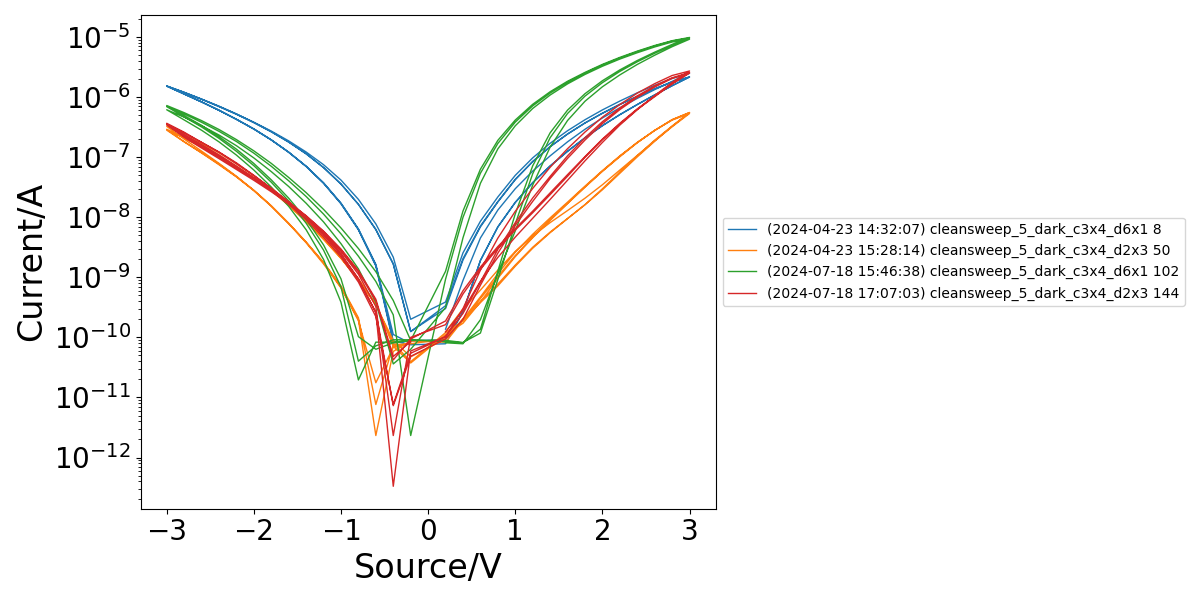

In [14]:

fig, ax = plt.subplots(figsize=(12,6))

# dvices before annealing:
for idx in [8, 50]:
    m = an.measurements[idx]
    data = m['data']
    meas_name = m['meas_name']
    timestamp = m['timestamp']
    device = m['device']
    cluster = m['cluster']
    label_string = f'({timestamp}) {meas_name} {idx}'
    
    # Uncomment to try out different auto labelling schemes
    #label_string = f'({timestamp}) {cluster} {device}'

    ax.plot(data[x_axis], np.abs(data[y_axis]), label=label_string, linewidth=1)

    

# devices after annealing:
for idx in [102, 144]:
    m = an.measurements[idx]
    data = m['data']
    meas_name = m['meas_name']
    timestamp = m['timestamp']
    device = m['device']
    cluster = m['cluster']
    label_string = f'({timestamp}) {meas_name} {idx}'
    
    #Uncomment to try out different auto labelling schemes
    #label_string = f'({timestamp}) {cluster} {device}'

    ax.plot(data[x_axis], np.abs(data[y_axis]), label=label_string, linewidth=1)

#fig.suptitle('cs_5_before_anneal_CrPt')

ax.set_xlabel(x_axis + '/V', fontsize=24)
ax.set_ylabel(y_axis + '/A', fontsize=24)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# set yscale to log if needed:
ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.tight_layout()



### cleansweep_5 - before & after anneal - CrPt - 40 nm device gap

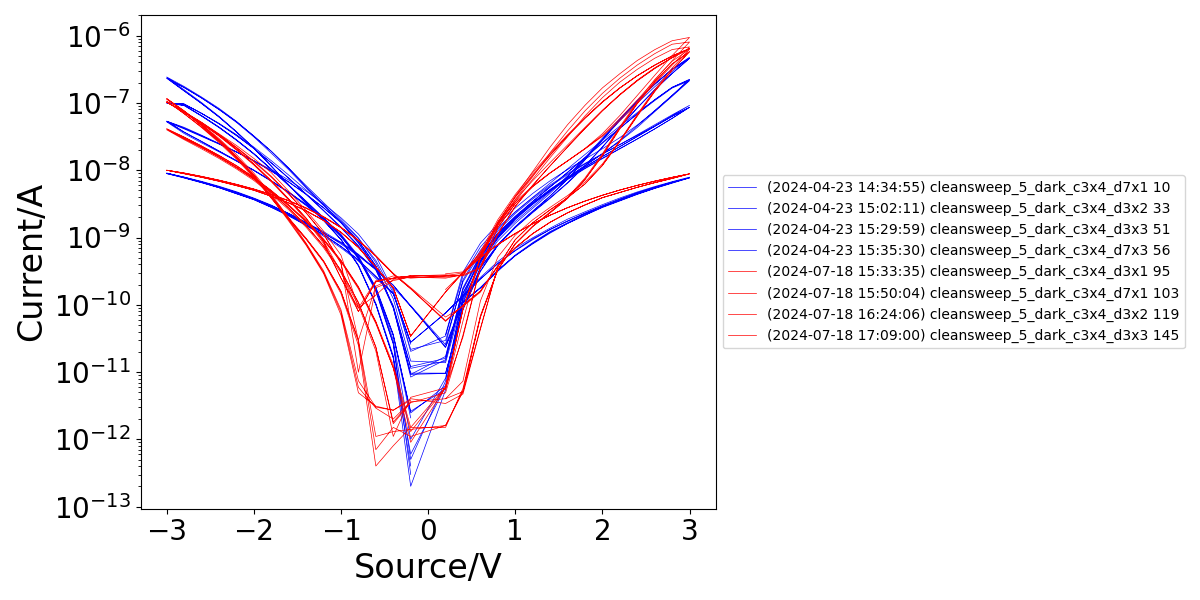

In [15]:
fig, ax = plt.subplots(figsize=(12,6))

# dvices before annealing:
for idx in [10, 33, 51, 56]:
    m = an.measurements[idx]
    data = m['data']
    meas_name = m['meas_name']
    timestamp = m['timestamp']
    device = m['device']
    cluster = m['cluster']
    label_string = f'({timestamp}) {meas_name} {idx}'
    
    # Uncomment to try out different auto labelling schemes
    #label_string = f'({timestamp}) {cluster} {device}'

    ax.plot(data[x_axis], np.abs(data[y_axis]), label=label_string, linewidth=0.5, color = 'blue')

# devices after annealing:
for idx in [95, 103, 119, 145]:
    m = an.measurements[idx]
    data = m['data']
    meas_name = m['meas_name']
    timestamp = m['timestamp']
    device = m['device']
    cluster = m['cluster']
    label_string = f'({timestamp}) {meas_name} {idx}'
    
    #Uncomment to try out different auto labelling schemes
    #label_string = f'({timestamp}) {cluster} {device}'

    ax.plot(data[x_axis], np.abs(data[y_axis]), label=label_string, linewidth=0.5, color='red')

#fig.suptitle('cs_5_before_anneal_CrPt')

ax.set_xlabel(x_axis + '/V', fontsize=24)
ax.set_ylabel(y_axis + '/A', fontsize=24)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# set yscale to log if needed:
ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.tight_layout()



### cleansweep_5 - before & after anneal - CrPt - 80 nm device gap

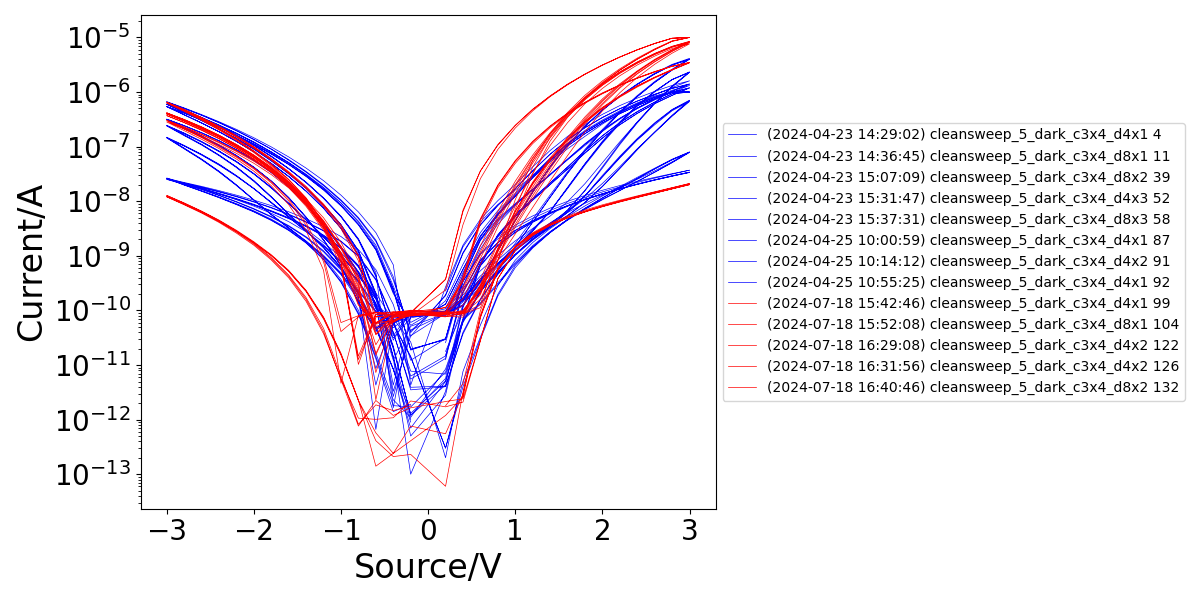

In [16]:
fig, ax = plt.subplots(figsize=(12,6))

# dvices before annealing:
for idx in [4, 11, 39, 52, 58, 87, 91, 92]:
    m = an.measurements[idx]
    data = m['data']
    meas_name = m['meas_name']
    timestamp = m['timestamp']
    device = m['device']
    cluster = m['cluster']
    label_string = f'({timestamp}) {meas_name} {idx}'
    
    # Uncomment to try out different auto labelling schemes
    #label_string = f'({timestamp}) {cluster} {device}'
 
    ax.plot(data[x_axis], np.abs(data[y_axis]), label=label_string, linewidth=0.5, color = 'blue')

#dvices after annealing:
for idx in [99, 104, 122, 126, 132]:
    m = an.measurements[idx]
    data = m['data']
    meas_name = m['meas_name']
    timestamp = m['timestamp']
    device = m['device']
    cluster = m['cluster']
    label_string = f'({timestamp}) {meas_name} {idx}'
    
    #Uncomment to try out different auto labelling schemes
    #label_string = f'({timestamp}) {cluster} {device}'
 
    ax.plot(data[x_axis], np.abs(data[y_axis]), label=label_string, linewidth=0.5, color='red')

#fig.suptitle('cs_5_before_anneal_CrPt')

ax.set_xlabel(x_axis + '/V', fontsize=24)
ax.set_ylabel(y_axis + '/A', fontsize=24)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# set yscale to log if needed:
ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.tight_layout()

### cleansweep_5 - before & after anneal - Pt - 20 nm device gap

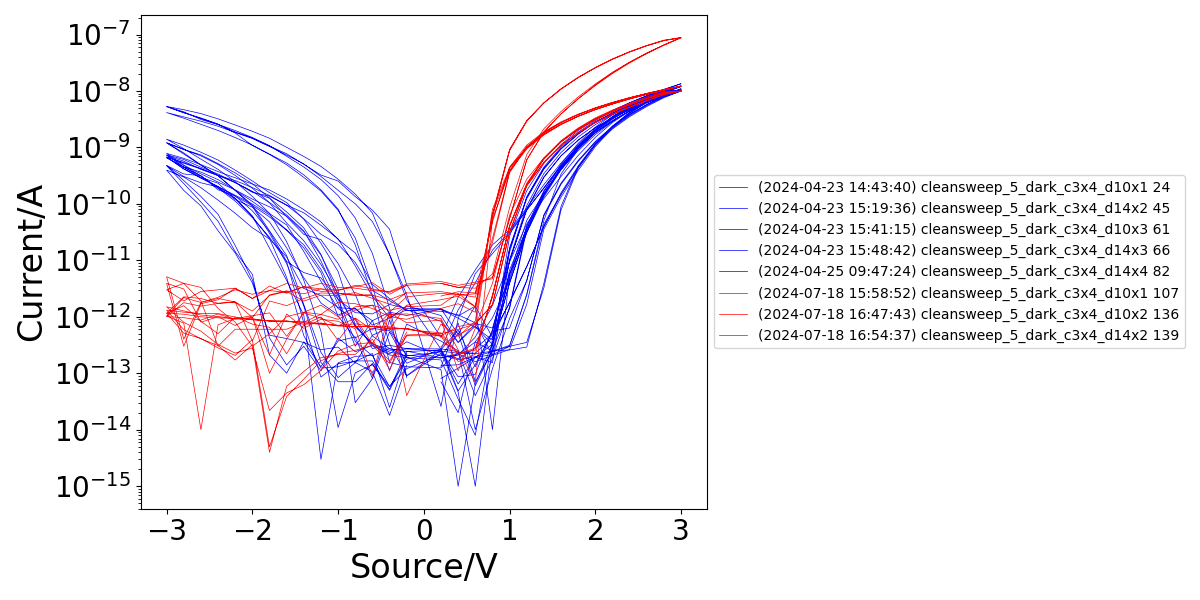

In [19]:
fig, ax = plt.subplots(figsize=(12,6))

# dvices before annealing:
for idx in [24, 45, 61, 66, 82]:
    m = an.measurements[idx]
    data = m['data']
    meas_name = m['meas_name']
    timestamp = m['timestamp']
    device = m['device']
    cluster = m['cluster']
    label_string = f'({timestamp}) {meas_name} {idx}'
    
    # Uncomment to try out different auto labelling schemes
    #label_string = f'({timestamp}) {cluster} {device}'
 
    ax.plot(data[x_axis], np.abs(data[y_axis]), label=label_string, linewidth=0.5, color = 'blue')

#dvices after annealing:
for idx in [107, 136, 139]:
    m = an.measurements[idx]
    data = m['data']
    meas_name = m['meas_name']
    timestamp = m['timestamp']
    device = m['device']
    cluster = m['cluster']
    label_string = f'({timestamp}) {meas_name} {idx}'
    
    #Uncomment to try out different auto labelling schemes
    #label_string = f'({timestamp}) {cluster} {device}'
 
    ax.plot(data[x_axis], np.abs(data[y_axis]), label=label_string, linewidth=0.5, color='red')

#fig.suptitle('cs_5_before_anneal_CrPt')

ax.set_xlabel(x_axis + '/V', fontsize=24)
ax.set_ylabel(y_axis + '/A', fontsize=24)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# set yscale to log if needed:
ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.tight_layout()

### cleansweep_5 - before & after anneal - Pt - 40 nm device gap

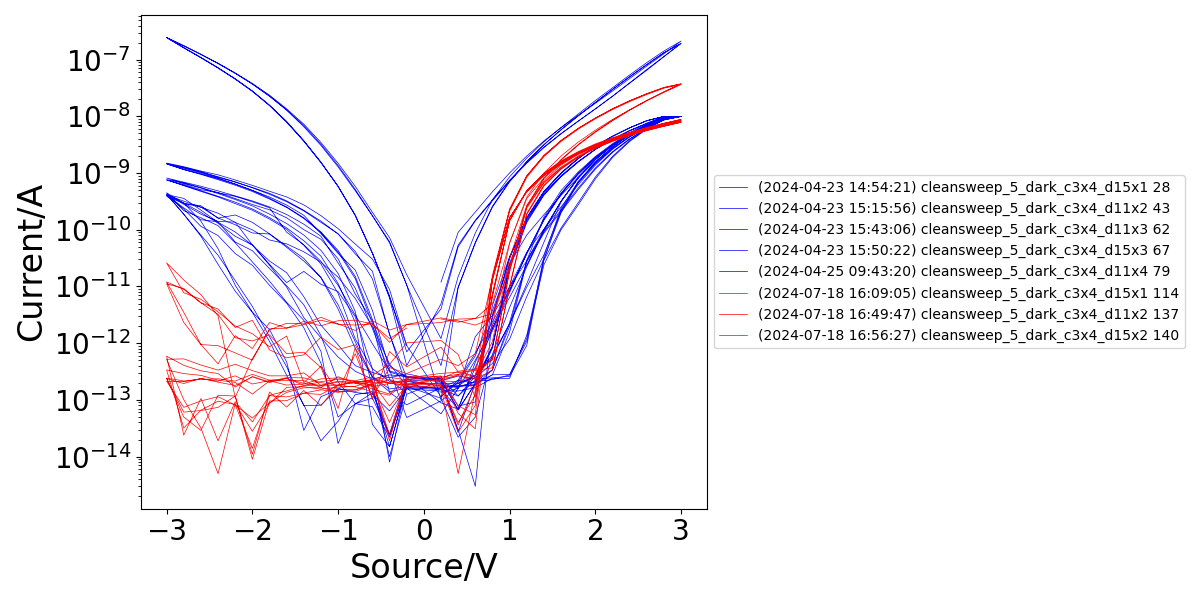

In [21]:
fig, ax = plt.subplots(figsize=(12,6))

# dvices before annealing:
for idx in [28, 43, 62, 67, 79]:
    m = an.measurements[idx]
    data = m['data']
    meas_name = m['meas_name']
    timestamp = m['timestamp']
    device = m['device']
    cluster = m['cluster']
    label_string = f'({timestamp}) {meas_name} {idx}'
    
    # Uncomment to try out different auto labelling schemes
    #label_string = f'({timestamp}) {cluster} {device}'

    ax.plot(data[x_axis], np.abs(data[y_axis]), label=label_string, linewidth=0.5, color = 'blue')

#dvices after annealing:
for idx in [114, 137, 140]:
    m = an.measurements[idx]
    data = m['data']
    meas_name = m['meas_name']
    timestamp = m['timestamp']
    device = m['device']
    cluster = m['cluster']
    label_string = f'({timestamp}) {meas_name} {idx}'
    
    #Uncomment to try out different auto labelling schemes
    #label_string = f'({timestamp}) {cluster} {device}'

    ax.plot(data[x_axis], np.abs(data[y_axis]), label=label_string, linewidth=0.5, color='red')

#fig.suptitle('cs_5_before_anneal_CrPt')

ax.set_xlabel(x_axis + '/V', fontsize=24)
ax.set_ylabel(y_axis + '/A', fontsize=24)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# set yscale to log if needed:
ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.tight_layout()

### cleansweep_5 - before & after anneal - Pt - 80 nm gap

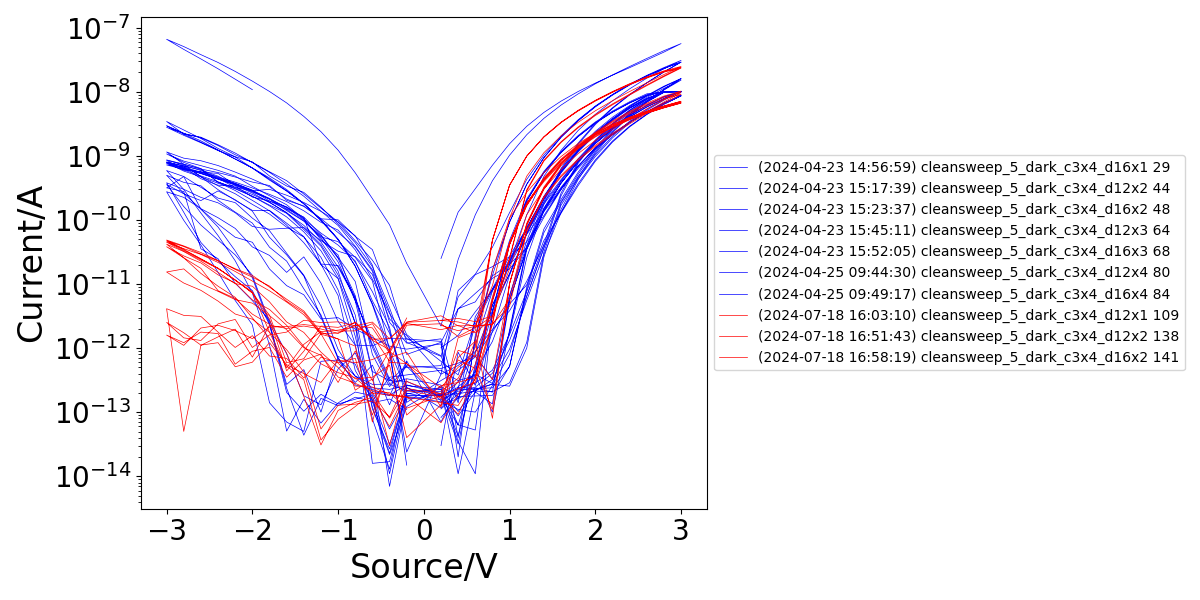

In [23]:
fig, ax = plt.subplots(figsize=(12,6))

# dvices before annealing:
for idx in [29, 44, 48, 64, 68, 80, 84]:
    m = an.measurements[idx]
    data = m['data']
    meas_name = m['meas_name']
    timestamp = m['timestamp']
    device = m['device']
    cluster = m['cluster']
    label_string = f'({timestamp}) {meas_name} {idx}'
    
    # Uncomment to try out different auto labelling schemes
    #label_string = f'({timestamp}) {cluster} {device}'
 
    ax.plot(data[x_axis], np.abs(data[y_axis]), label=label_string, linewidth=0.5, color = 'blue')

#dvices after annealing:
for idx in [109, 138, 141]:
    m = an.measurements[idx]
    data = m['data']
    meas_name = m['meas_name']
    timestamp = m['timestamp']
    device = m['device']
    cluster = m['cluster']
    label_string = f'({timestamp}) {meas_name} {idx}'
    
    #Uncomment to try out different auto labelling schemes
    #label_string = f'({timestamp}) {cluster} {device}'
 
    ax.plot(data[x_axis], np.abs(data[y_axis]), label=label_string, linewidth=0.5, color='red')

#fig.suptitle('cs_5_before_anneal_CrPt')

ax.set_xlabel(x_axis + '/V', fontsize=24)
ax.set_ylabel(y_axis + '/A', fontsize=24)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# set yscale to log if needed:
ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.tight_layout()

### cleansweep_5, cleansweep_8 & nimbus_1 - before annealing - CrPt:

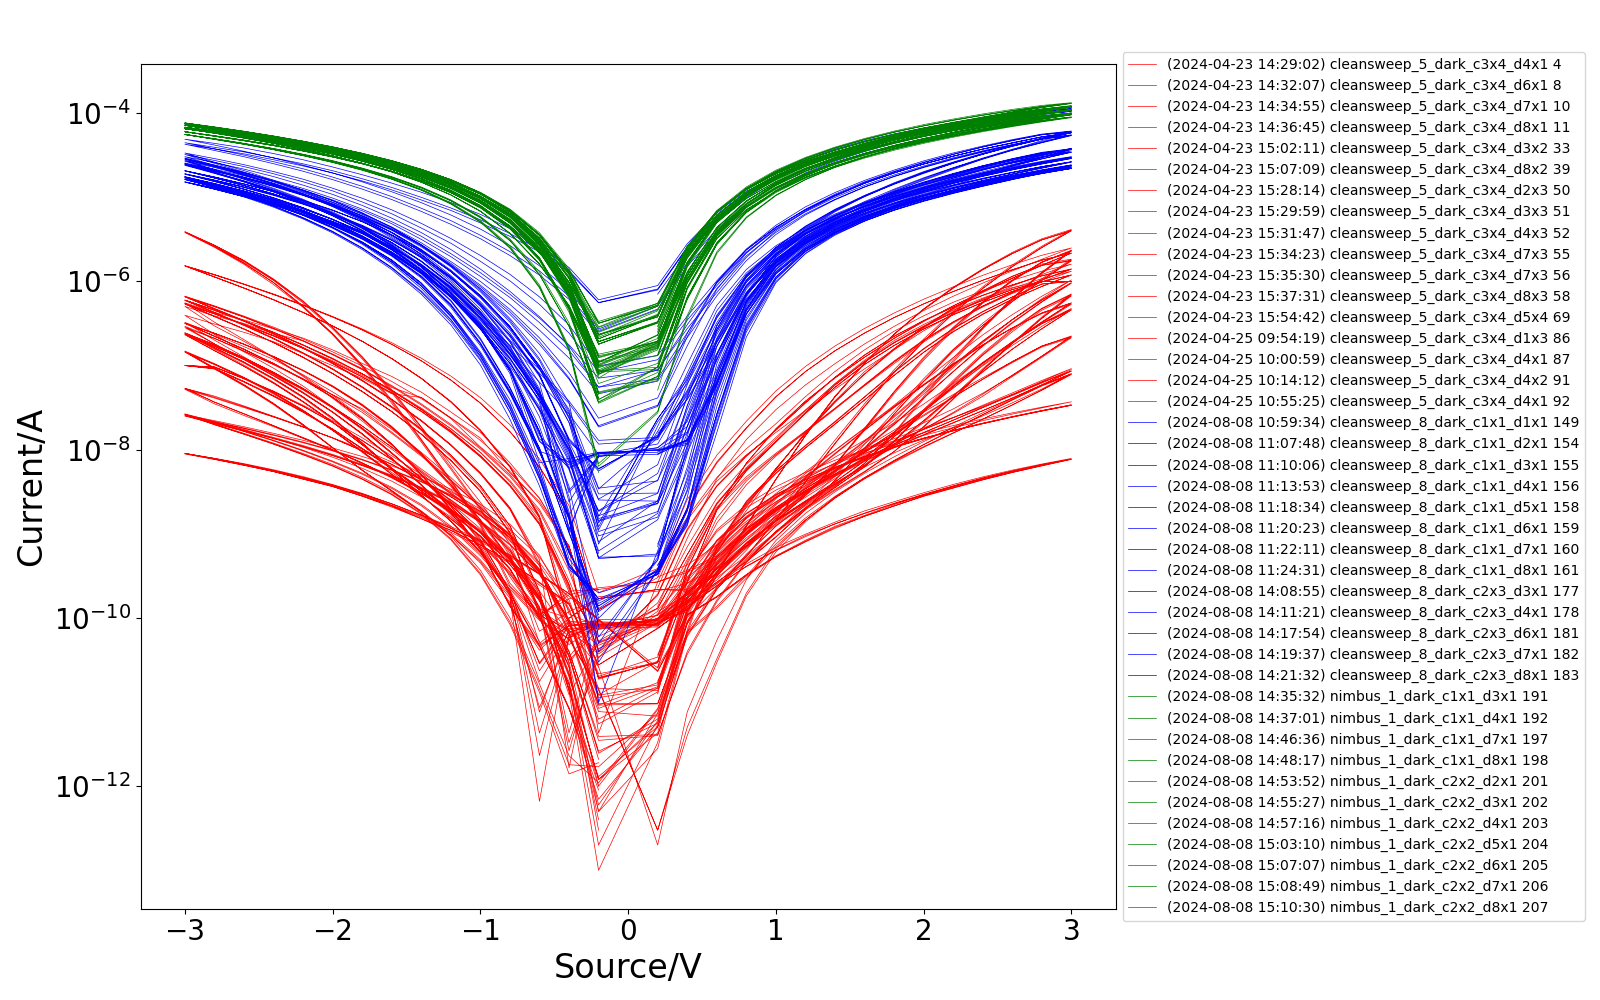

In [25]:
import matplotlib.ticker as tck

fig, ax = plt.subplots(figsize=(16,10))

for idx in cs_5_before_anneal_CrPt:
    m = an.measurements[idx]
    data = m['data']
    meas_name = m['meas_name']
    timestamp = m['timestamp']
    device = m['device']
    cluster = m['cluster']
    label_string = f'({timestamp}) {meas_name} {idx}'
    
    # Uncomment to try out different auto labelling schemes
    #label_string = f'({timestamp}) {cluster} {device}'
 
    ax.plot(data[x_axis], np.abs(data[y_axis]), label=label_string, linewidth=0.5, color = 'red')

for idx in cs_8_before_anneal_CrPt:
    m = an.measurements[idx]
    data = m['data']
    meas_name = m['meas_name']
    timestamp = m['timestamp']
    device = m['device']
    cluster = m['cluster']
    label_string = f'({timestamp}) {meas_name} {idx}'
    
    #Uncomment to try out different auto labelling schemes
    #label_string = f'({timestamp}) {cluster} {device}'
 
    ax.plot(data[x_axis], np.abs(data[y_axis]), label=label_string, linewidth=0.5, color='blue')

for idx in nb_1_before_anneal_CrPt:
    m = an.measurements[idx]
    data = m['data']
    meas_name = m['meas_name']
    timestamp = m['timestamp']
    device = m['device']
    cluster = m['cluster']
    label_string = f'({timestamp}) {meas_name} {idx}'
    
    #Uncomment to try out different auto labelling schemes
    #label_string = f'({timestamp}) {cluster} {device}'
 
    ax.plot(data[x_axis], np.abs(data[y_axis]), label=label_string, linewidth=0.5, color='green')


#fig.suptitle('cs_5_before_anneal_CrPt')

ax.set_xlabel(x_axis + '/V', fontsize=24)
ax.set_ylabel(y_axis + '/A', fontsize=24)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# set yscale to log if needed:
ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.tight_layout()



In [ ]:
safenames = [f'cleansweep_5-before&afterAnneal-Pt-80nmDeviceGap']
figures = [fig]
save_figures(figures, safenames, directory, filetype='pdf')

/baltic/users/optolabdata/Experiments/ChristophWeilenmann/2024-08-13_cleansweep_5_8_nimbus_1/clean/cleansweep_5-before&afterAnneal-Pt-80nmDeviceGap


### cleansweep_5, cleansweep_8 & nimbus_1 - before annealing - CrPt - 40 nm device gap

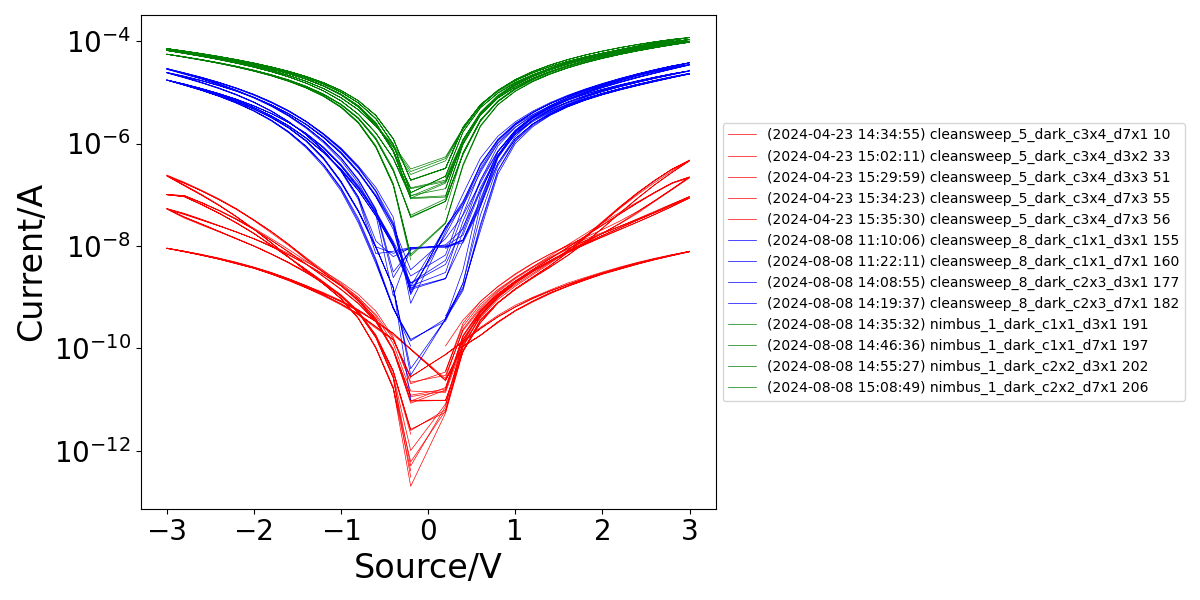

In [44]:
fig, ax = plt.subplots(figsize=(12,6))

# cleansweep 5:
for idx in [10, 33, 51, 55, 56]:
    m = an.measurements[idx]
    data = m['data']
    meas_name = m['meas_name']
    timestamp = m['timestamp']
    device = m['device']
    cluster = m['cluster']
    label_string = f'({timestamp}) {meas_name} {idx}'
    
    # Uncomment to try out different auto labelling schemes
    #label_string = f'({timestamp}) {cluster} {device}'
 
    ax.plot(data[x_axis], np.abs(data[y_axis]), label=label_string, linewidth=0.5, color = 'red')

# cleansweep 8:
for idx in [155, 160, 177, 182]:
    m = an.measurements[idx]
    data = m['data']
    meas_name = m['meas_name']
    timestamp = m['timestamp']
    device = m['device']
    cluster = m['cluster']
    label_string = f'({timestamp}) {meas_name} {idx}'
    
    #Uncomment to try out different auto labelling schemes
    #label_string = f'({timestamp}) {cluster} {device}'
 
    ax.plot(data[x_axis], np.abs(data[y_axis]), label=label_string, linewidth=0.5, color='blue')

# nimbus 1:
for idx in [191, 197, 202, 206]:
    m = an.measurements[idx]
    data = m['data']
    meas_name = m['meas_name']
    timestamp = m['timestamp']
    device = m['device']
    cluster = m['cluster']
    label_string = f'({timestamp}) {meas_name} {idx}'
    
    #Uncomment to try out different auto labelling schemes
    #label_string = f'({timestamp}) {cluster} {device}'
 
    ax.plot(data[x_axis], np.abs(data[y_axis]), label=label_string, linewidth=0.5, color='green')


#fig.suptitle('cs_5_before_anneal_CrPt')

ax.set_xlabel(x_axis + '/V', fontsize=24)
ax.set_ylabel(y_axis + '/A', fontsize=24)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# set yscale to log if needed:
ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.tight_layout()



### cleansweep_5, cleansweep_8 & nimbus_1 - before annealing - CrPt - 80 nm device gap

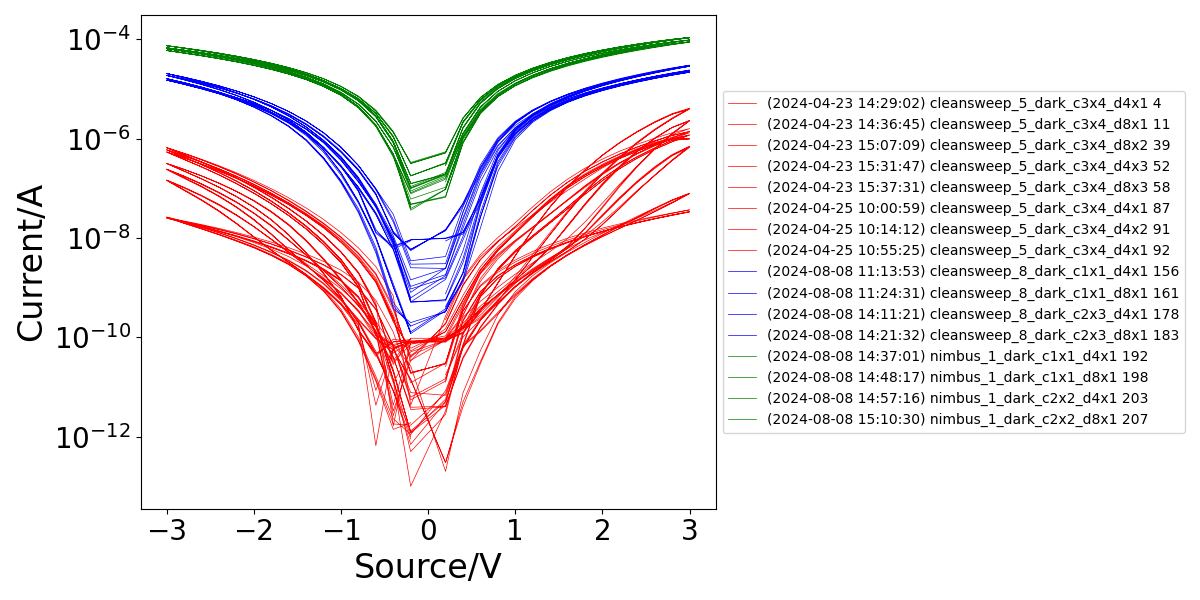

In [30]:
fig, ax = plt.subplots(figsize=(12,6))

# cleansweep 5:
for idx in [4, 11, 39, 52, 58, 87, 91, 92]:
    m = an.measurements[idx]
    data = m['data']
    meas_name = m['meas_name']
    timestamp = m['timestamp']
    device = m['device']
    cluster = m['cluster']
    label_string = f'({timestamp}) {meas_name} {idx}'
    
    # Uncomment to try out different auto labelling schemes
    #label_string = f'({timestamp}) {cluster} {device}'
 
    ax.plot(data[x_axis], np.abs(data[y_axis]), label=label_string, linewidth=0.5, color = 'red')

# cleansweep 8:
for idx in [156, 161, 178, 183]:
    m = an.measurements[idx]
    data = m['data']
    meas_name = m['meas_name']
    timestamp = m['timestamp']
    device = m['device']
    cluster = m['cluster']
    label_string = f'({timestamp}) {meas_name} {idx}'
    
    #Uncomment to try out different auto labelling schemes
    #label_string = f'({timestamp}) {cluster} {device}'
 
    ax.plot(data[x_axis], np.abs(data[y_axis]), label=label_string, linewidth=0.5, color='blue')

# nimbus 1:
for idx in [192, 198, 203, 207]:
    m = an.measurements[idx]
    data = m['data']
    meas_name = m['meas_name']
    timestamp = m['timestamp']
    device = m['device']
    cluster = m['cluster']
    label_string = f'({timestamp}) {meas_name} {idx}'
    
    #Uncomment to try out different auto labelling schemes
    #label_string = f'({timestamp}) {cluster} {device}'
 
    ax.plot(data[x_axis], np.abs(data[y_axis]), label=label_string, linewidth=0.5, color='green')


#fig.suptitle('cs_5_before_anneal_CrPt')

ax.set_xlabel(x_axis + '/V', fontsize=24)
ax.set_ylabel(y_axis + '/A', fontsize=24)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# set yscale to log if needed:
ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.tight_layout()



### cleansweep_5, cleansweep_8 & nimbus_1 - before annealing - Pt:

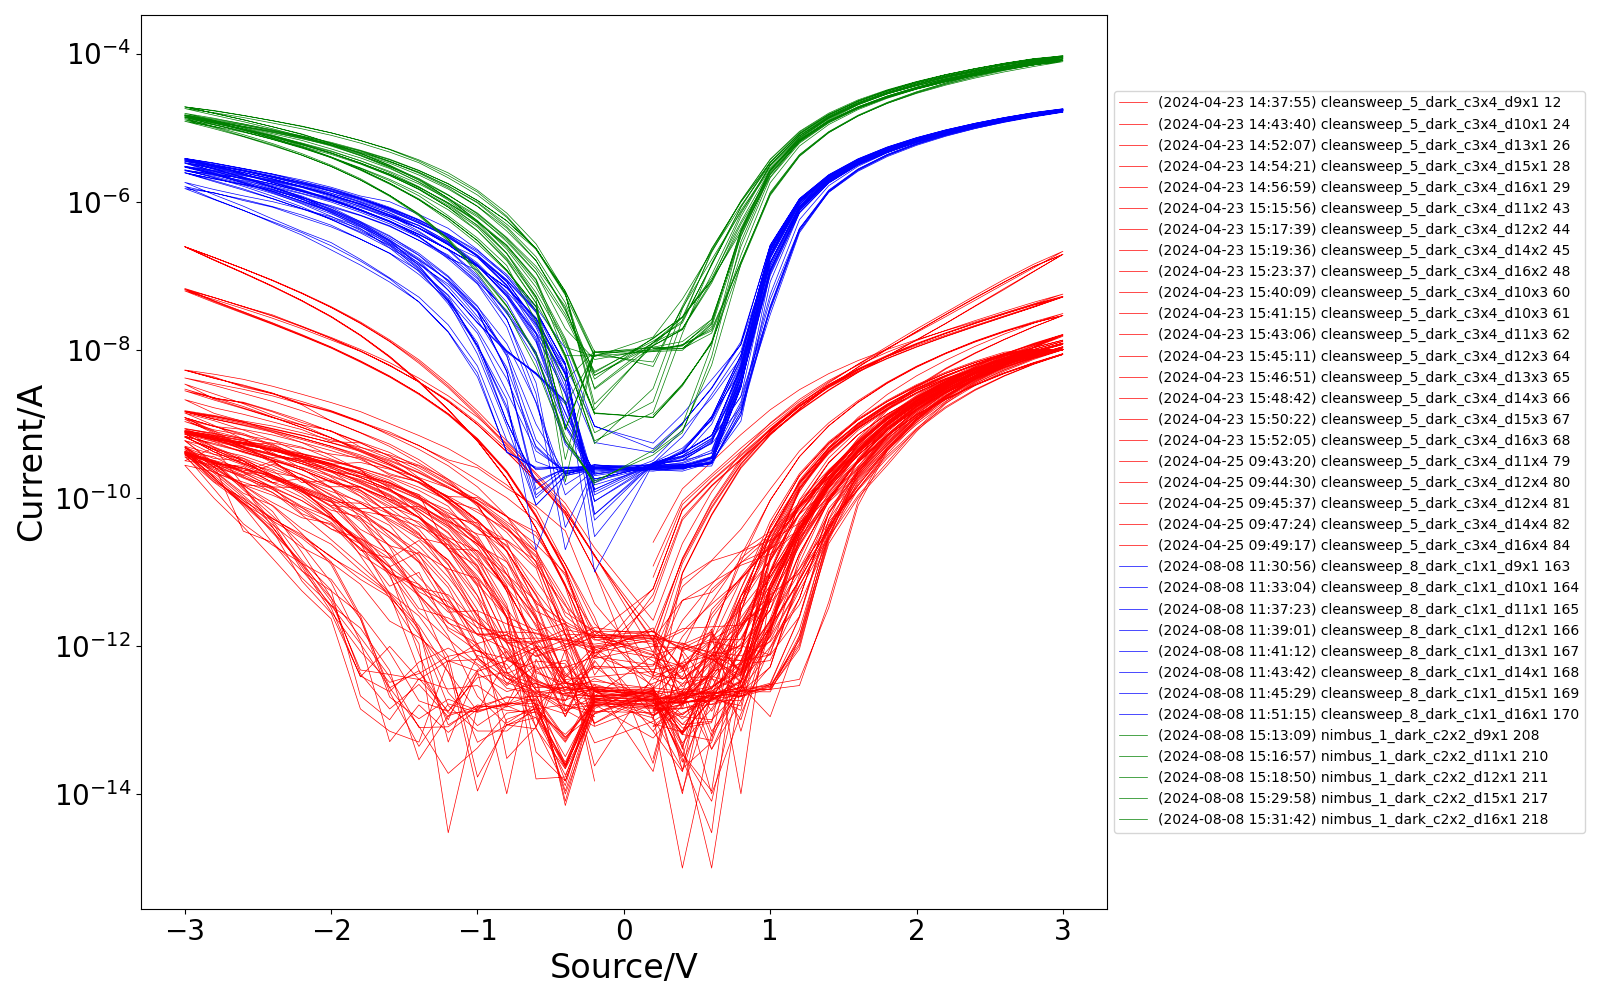

In [20]:
fig, ax = plt.subplots(figsize=(16,10))

for idx in cs_5_before_anneal_Pt:
    m = an.measurements[idx]
    data = m['data']
    meas_name = m['meas_name']
    timestamp = m['timestamp']
    device = m['device']
    cluster = m['cluster']
    label_string = f'({timestamp}) {meas_name} {idx}'
    
    # Uncomment to try out different auto labelling schemes
    #label_string = f'({timestamp}) {cluster} {device}'
 
    ax.plot(data[x_axis], np.abs(data[y_axis]), label=label_string, linewidth=0.5, color = 'red')

for idx in cs_8_before_anneal_Pt:
    m = an.measurements[idx]
    data = m['data']
    meas_name = m['meas_name']
    timestamp = m['timestamp']
    device = m['device']
    cluster = m['cluster']
    label_string = f'({timestamp}) {meas_name} {idx}'
    
    #Uncomment to try out different auto labelling schemes
    #label_string = f'({timestamp}) {cluster} {device}'
 
    ax.plot(data[x_axis], np.abs(data[y_axis]), label=label_string, linewidth=0.5, color='blue')

for idx in nb_1_before_anneal_Pt:
    m = an.measurements[idx]
    data = m['data']
    meas_name = m['meas_name']
    timestamp = m['timestamp']
    device = m['device']
    cluster = m['cluster']
    label_string = f'({timestamp}) {meas_name} {idx}'
    
    #Uncomment to try out different auto labelling schemes
    #label_string = f'({timestamp}) {cluster} {device}'
 
    ax.plot(data[x_axis], np.abs(data[y_axis]), label=label_string, linewidth=0.5, color='green')


#fig.suptitle('cs_5_before_anneal_CrPt')

ax.set_xlabel(x_axis + '/V', fontsize=24)
ax.set_ylabel(y_axis + '/A', fontsize=24)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# set yscale to log if needed:
ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.tight_layout()



### cleansweep_5, cleansweep_8 & nimbus_1 - before annealing - Pt - 40nm device gap:

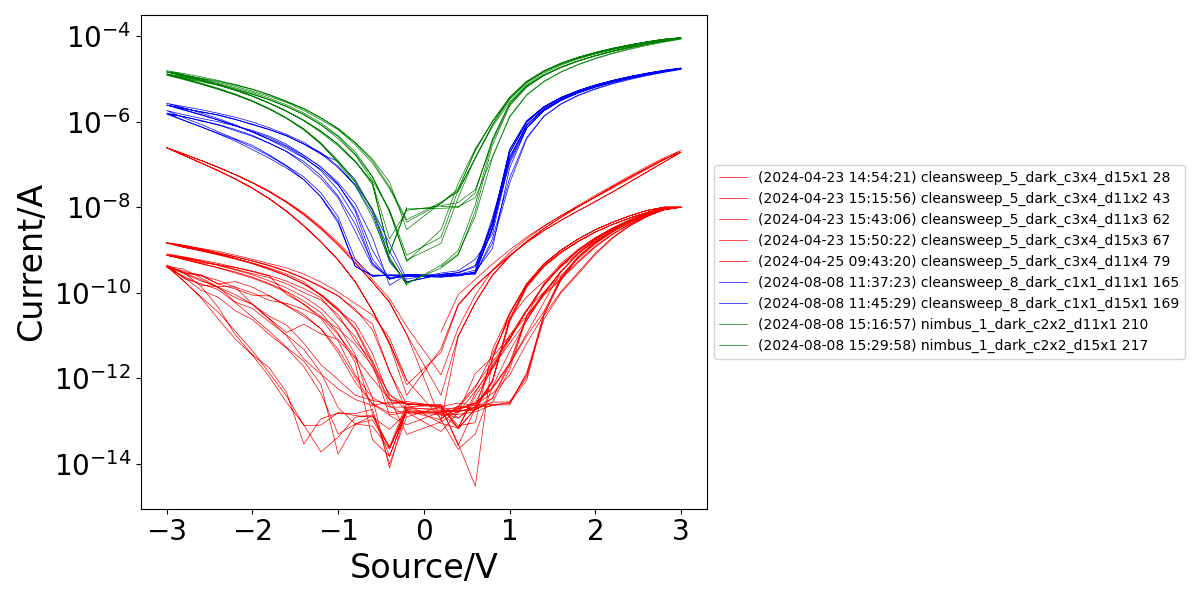

In [28]:
fig, ax = plt.subplots(figsize=(12,6))

# cleansweep_5:
for idx in [28, 43, 62, 67, 79]:
    m = an.measurements[idx]
    data = m['data']
    meas_name = m['meas_name']
    timestamp = m['timestamp']
    device = m['device']
    cluster = m['cluster']
    label_string = f'({timestamp}) {meas_name} {idx}'
    
    # Uncomment to try out different auto labelling schemes
    #label_string = f'({timestamp}) {cluster} {device}'
 
    ax.plot(data[x_axis], np.abs(data[y_axis]), label=label_string, linewidth=0.5, color = 'red')

# cleansweep_8:
for idx in [165, 169]:
    m = an.measurements[idx]
    data = m['data']
    meas_name = m['meas_name']
    timestamp = m['timestamp']
    device = m['device']
    cluster = m['cluster']
    label_string = f'({timestamp}) {meas_name} {idx}'
    
    #Uncomment to try out different auto labelling schemes
    #label_string = f'({timestamp}) {cluster} {device}'
 
    ax.plot(data[x_axis], np.abs(data[y_axis]), label=label_string, linewidth=0.5, color='blue')

# nimbus_1:
for idx in [210, 217]:
    m = an.measurements[idx]
    data = m['data']
    meas_name = m['meas_name']
    timestamp = m['timestamp']
    device = m['device']
    cluster = m['cluster']
    label_string = f'({timestamp}) {meas_name} {idx}'
    
    #Uncomment to try out different auto labelling schemes
    #label_string = f'({timestamp}) {cluster} {device}'
 
    ax.plot(data[x_axis], np.abs(data[y_axis]), label=label_string, linewidth=0.5, color='green')


#fig.suptitle('cs_5_before_anneal_CrPt')

ax.set_xlabel(x_axis + '/V', fontsize=24)
ax.set_ylabel(y_axis + '/A', fontsize=24)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# set yscale to log if needed:
ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.tight_layout()



### cleansweep_5, cleansweep_8 & nimbus_1 - before annealing - Pt - 80nm device gap:

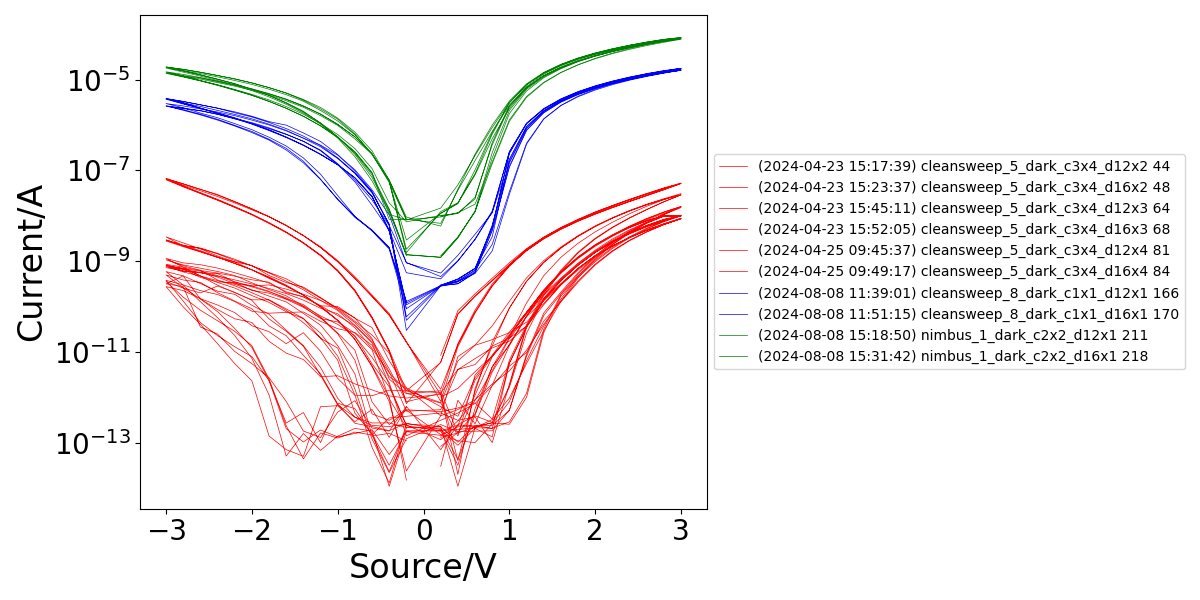

In [31]:
fig, ax = plt.subplots(figsize=(12,6))

# cleansweep_5:
for idx in [44, 48, 64, 68, 81, 84]:
    m = an.measurements[idx]
    data = m['data']
    meas_name = m['meas_name']
    timestamp = m['timestamp']
    device = m['device']
    cluster = m['cluster']
    label_string = f'({timestamp}) {meas_name} {idx}'
    
    # Uncomment to try out different auto labelling schemes
    #label_string = f'({timestamp}) {cluster} {device}'
 
    ax.plot(data[x_axis], np.abs(data[y_axis]), label=label_string, linewidth=0.5, color = 'red')

# cleansweep_8:
for idx in [166, 170]:
    m = an.measurements[idx]
    data = m['data']
    meas_name = m['meas_name']
    timestamp = m['timestamp']
    device = m['device']
    cluster = m['cluster']
    label_string = f'({timestamp}) {meas_name} {idx}'
    
    #Uncomment to try out different auto labelling schemes
    #label_string = f'({timestamp}) {cluster} {device}'
 
    ax.plot(data[x_axis], np.abs(data[y_axis]), label=label_string, linewidth=0.5, color='blue')

# nimbus_1:
for idx in [211, 218]:
    m = an.measurements[idx]
    data = m['data']
    meas_name = m['meas_name']
    timestamp = m['timestamp']
    device = m['device']
    cluster = m['cluster']
    label_string = f'({timestamp}) {meas_name} {idx}'
    
    #Uncomment to try out different auto labelling schemes
    #label_string = f'({timestamp}) {cluster} {device}'
 
    ax.plot(data[x_axis], np.abs(data[y_axis]), label=label_string, linewidth=0.5, color='green')


#fig.suptitle('cs_5_before_anneal_CrPt')

ax.set_xlabel(x_axis + '/V', fontsize=24)
ax.set_ylabel(y_axis + '/A', fontsize=24)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# set yscale to log if needed:
ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.tight_layout()



In [21]:
safenames = [f'nimbus_1_filament_switching']
figures = [fig]
save_figures(figures, safenames, directory, filetype='pdf')